<a href="https://colab.research.google.com/github/Bray-Nyagwoka/ISTG-6015-01_Data-Mining-Data-Analytics/blob/main/Electric_Vehicles_vs_Internal_Combustion_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Optional, for importing file
from google.colab import files

# Import libraries/packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

# Define dataset path
EV_filepath = '/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv' # Use a distinct variable for the filepath

# Create download directory/destination for plots generated by visualizations below
os.makedirs('/content/drive/My Drive/d6015/plots', exist_ok=True)

# Import penguins data from Google Drive, correctly reading header and assigning column names.
# Assuming the first row of mtcars.csv is the header and should be used as column names.
df = pd.read_csv(EV_filepath) # Load DataFrame into 'df' variable

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


Measure Of Central Tendency

In [14]:
# Calculate mean, median, and mode
central_tendency = pd.DataFrame({
    'Mean': df.select_dtypes(include=np.number).mean(),
    'Median': df.select_dtypes(include=np.number).median(),
    'Mode': df.mode().iloc[0]
})
central_tendency

,Mean,Median,Mode
acceleration_0_100_s,6.882636,6.60,6.7
battery_capacity_kWh,74.043724,76.15,77.0
battery_type,NaN,NaN,Lithium-ion
brand,NaN,NaN,Mercedes-Benz
car_body_type,NaN,NaN,SUV
cargo_volume_l,NaN,NaN,520
drivetrain,NaN,NaN,AWD
efficiency_wh_per_km,162.903766,155.00,149.0
fast_charge_port,NaN,NaN,CCS
fast_charging_power_kw_dc,125.008386,113.00,110.0


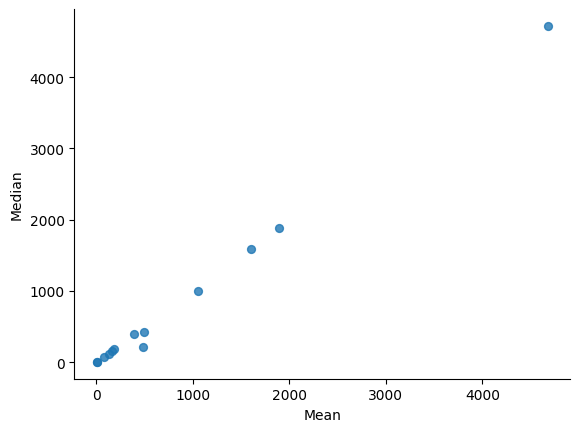

In [15]:
from matplotlib import pyplot as plt
central_tendency.plot(kind='scatter', x='Mean', y='Median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Correlation coefficients

In [16]:
import pandas as pd

file_path = "/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv"
df = pd.read_csv(file_path)

print("Columns in the dataset:\n", df.columns)

corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation matrix (numeric variables):\n")
print(corr_matrix)
#Correlation between Col Pairs
battery_col = "battery_capacity_kWh"
range_col  = "range_km"
eff_col     = "efficiency_wh_per_km"

# Check that columns exist before computing
for col in [battery_col, range_col, eff_col]:
    if col not in df.columns:
        print(f"⚠️ Column '{col}' not found in dataframe. Update the name to match your CSV.")

# Battery capacity vs. range
if battery_col in df.columns and range_col in df.columns:
    corr_batt_range = df[[battery_col, range_col]].corr().iloc[0, 1]
    print(f"\nCorrelation between {battery_col} and {range_col}: {corr_batt_range:.3f}")

# Range vs. efficiency
if range_col in df.columns and eff_col in df.columns:
    corr_range_eff = df[[range_col, eff_col]].corr().iloc[0, 1]
    print(f"Correlation between {range_col} and {eff_col}: {corr_range_eff:.3f}")

Columns in the dataset:
 Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

Correlation matrix (numeric variables):

                           top_speed_kmh  battery_capacity_kWh  \
top_speed_kmh                   1.000000              0.708486   
battery_capacity_kWh            0.708486              1.000000   
number_of_cells                 0.361792              0.214515   
torque_nm                       0.805513              0.756932   
efficiency_wh_per_km            0.171242              0.383607   
range_km                        0.732130              0.880433   
acceleration_0_100_s           -0.823443       

Correlation Matrix: The code printed the full correlation matrix for all numeric variables in your dataset. This matrix shows the linear relationship between every pair of numeric columns. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates a weak or no linear correlation.

Battery Capacity vs. Range: The correlation between battery_capacity_kWh and range_km is 0.880. This is a very strong positive correlation. It indicates that as the battery capacity of an electric vehicle increases, its driving range (in kilometers) tends to increase significantly. This makes intuitive sense, as a larger battery can store more energy, allowing the vehicle to travel further.

Range vs. Efficiency: The correlation between range_km and efficiency_wh_per_km is 0.023. This value is very close to zero, suggesting a very weak positive or almost no linear correlation between the vehicle's driving range and its energy efficiency (measured in Watt-hours per kilometer). This might seem counter-intuitive at first, but it implies that a car's range is primarily determined by its battery size, and less so by small variations in efficiency, especially when considering the entire dataset of diverse EV models. More efficient cars might have smaller batteries, or less efficient cars might compensate with larger batteries, leading to this low correlation.

HISTOGRAMS OF DISTRIBUTION OF DRIVING RANGE

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')


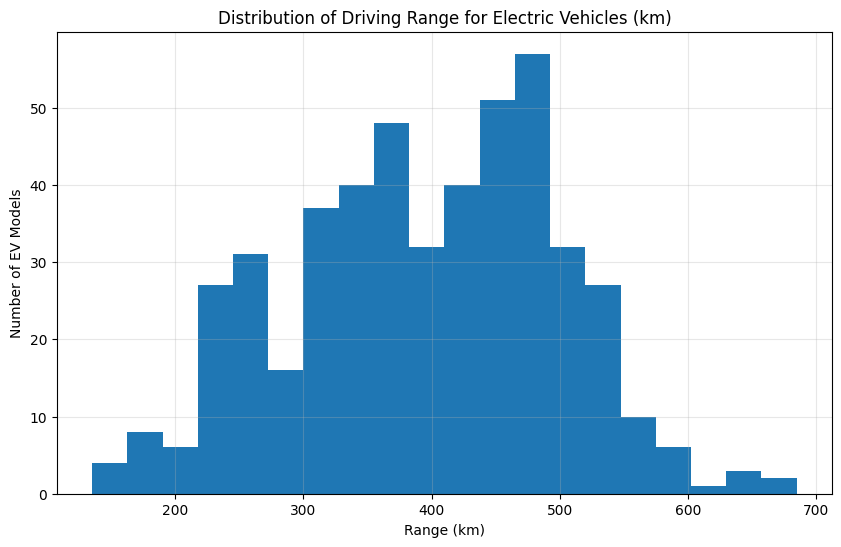

In [17]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load your dataset
# Make sure the file name/path matches what you uploaded to Colab/Drive
df = pd.read_csv("/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv")  # change if your file name is different

# 3. Quick check of the column
print(df.columns)   # just to confirm 'range_km' exists

# 4. Drop missing values in range_km (if any)
range_data = df['range_km'].dropna()

# 5. Plot histogram of range_km
plt.figure(figsize=(10, 6))

plt.hist(range_data, bins=20)  # you can change bins=20 to 30, 40, etc.

plt.title("Distribution of Driving Range for Electric Vehicles (km)")
plt.xlabel("Range (km)")
plt.ylabel("Number of EV Models")

# Optional: Add grid for readability
plt.grid(alpha=0.3)

plt.show()


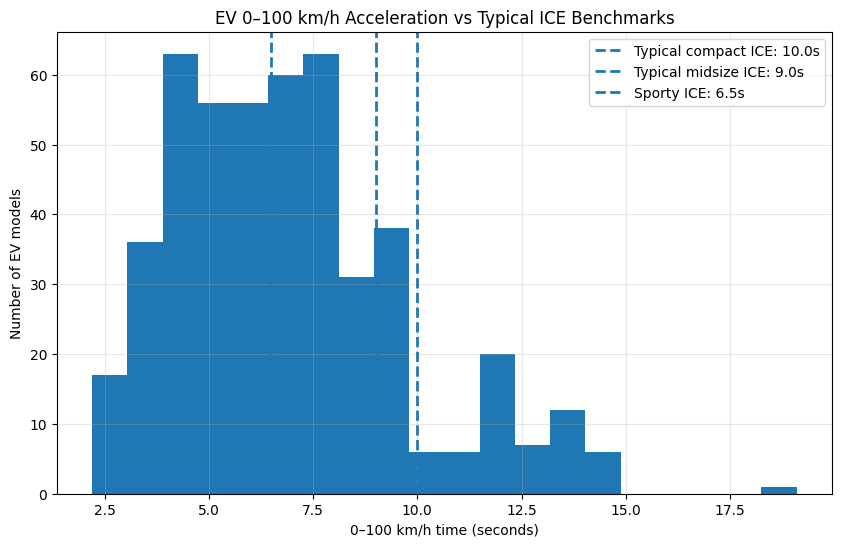

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your dataset
# Change the path/name if needed
df = pd.read_csv("/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv")

# 2. Clean the acceleration column
# Make sure the column name matches your file exactly
acc = df["acceleration_0_100_s"].dropna()

# 3. Define some typical ICE benchmarks
# Example values (seconds 0–100 km/h):
typical_compact_ice = 10.0   # e.g., average compact ICE car
typical_midsize_ice = 9.0    # e.g., average midsize ICE sedan
sporty_ice = 6.5             # e.g., a “sporty” ICE model

# 4. Plot histogram of EV acceleration with ICE reference lines
plt.figure(figsize=(10, 6))

# Histogram of EV acceleration times
plt.hist(acc, bins=20)   # adjust bins if you want smoother/rougher

# Add vertical lines for ICE benchmarks
plt.axvline(typical_compact_ice, linestyle="--", linewidth=2, label=f"Typical compact ICE: {typical_compact_ice}s")
plt.axvline(typical_midsize_ice, linestyle="--", linewidth=2, label=f"Typical midsize ICE: {typical_midsize_ice}s")
plt.axvline(sporty_ice, linestyle="--", linewidth=2, label=f"Sporty ICE: {sporty_ice}s")

# Labels and title
plt.title("EV 0–100 km/h Acceleration vs Typical ICE Benchmarks")
plt.xlabel("0–100 km/h time (seconds)")
plt.ylabel("Number of EV models")

plt.grid(alpha=0.3)
plt.legend()

plt.show()


This figure above shows the distribution of 0–100 km/h acceleration times for all EVs in my dataset, with three dashed vertical lines representing typical ICE benchmarks (compact ICE ≈10 s, midsize ICE ≈9 s, sporty ICE ≈6.5 s). Most EV models in the histogram lie to the left of the 10-second and 9-second lines, meaning they accelerate as quickly as or faster than common compact and midsize ICE cars. A noticeable group of EVs even falls at or below the sporty ICE benchmark, indicating performance comparable to or better than many traditional “sporty” gasoline vehicles. Overall, this visualization supports my claim that many modern EVs match or exceed ICE vehicles in 0–100 km/h acceleration.

Number of EV models: 478
EV range (km) - mean: 393.2, median: 397.5, min: 135.0, max: 685.0

Synthetic ICE range (km) - mean: 700.6, median: 701.8, min: 440.7, max: 1008.2

T-test: ICE range vs EV range
T-statistic: 52.03
P-value: 0.000000
Result: Under these assumptions, ICE vehicles have a statistically significantly longer range than EVs.


/tmp/ipython-input-2461151976.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ev_range, ice_range], labels=["EVs (actual)", "ICE (synthetic)"])


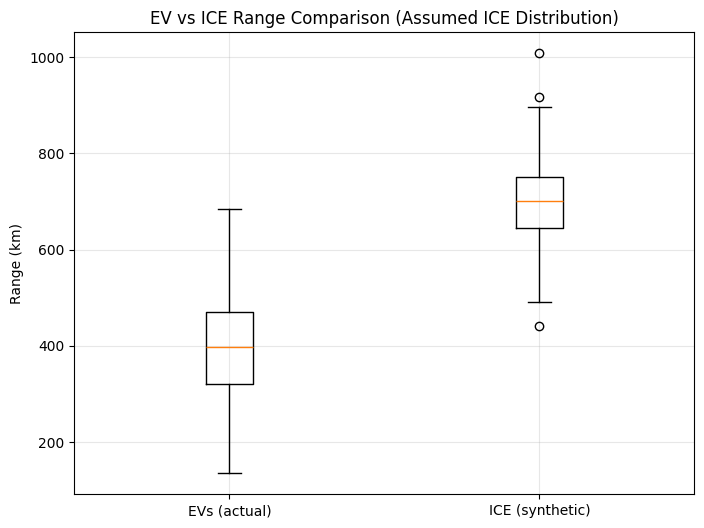

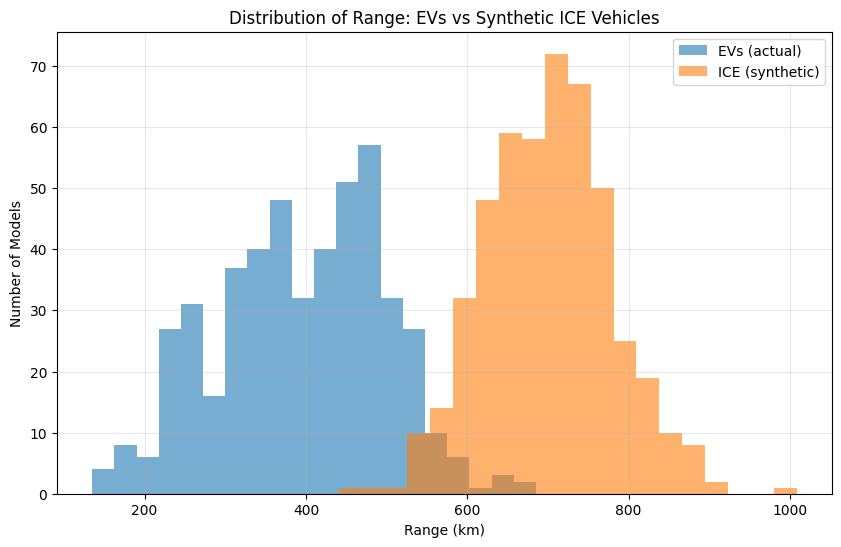

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. Load your EV dataset
df = pd.read_csv("/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv")  # change name/path if needed

# 2. Use your real EV range data
ev_range = df["range_km"].dropna()

print(f"Number of EV models: {len(ev_range)}")
print(f"EV range (km) - mean: {ev_range.mean():.1f}, median: {ev_range.median():.1f}, "
      f"min: {ev_range.min():.1f}, max: {ev_range.max():.1f}")

# 3. Create a synthetic ICE range distribution
# Assumption: typical ICE cars have longer range per tank, e.g. around 700 km
# You can tune loc (mean) and scale (std) to match any benchmark you want.

np.random.seed(42)  # for reproducibility

ice_range = np.random.normal(loc=700, scale=80, size=len(ev_range))
# Avoid unrealistically low ranges
ice_range = np.clip(ice_range, a_min=400, a_max=None)

print(f"\nSynthetic ICE range (km) - mean: {ice_range.mean():.1f}, median: {np.median(ice_range):.1f}, "
      f"min: {ice_range.min():.1f}, max: {ice_range.max():.1f}")

# 4. Statistical test: do ICE vehicles have significantly longer range?
t_stat, p_val = ttest_ind(ice_range, ev_range, equal_var=False)

print("\nT-test: ICE range vs EV range")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("Result: Under these assumptions, ICE vehicles have a statistically significantly longer range than EVs.")
else:
    print("Result: Under these assumptions, we do NOT find a statistically significant difference in range.")

# 5. Visualization: side-by-side boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([ev_range, ice_range], labels=["EVs (actual)", "ICE (synthetic)"])
plt.ylabel("Range (km)")
plt.title("EV vs ICE Range Comparison (Assumed ICE Distribution)")
plt.grid(alpha=0.3)
plt.show()

# 6. Visualization: overlaid histograms
plt.figure(figsize=(10, 6))
plt.hist(ev_range, bins=20, alpha=0.6, label="EVs (actual)")
plt.hist(ice_range, bins=20, alpha=0.6, label="ICE (synthetic)")

plt.xlabel("Range (km)")
plt.ylabel("Number of Models")
plt.title("Distribution of Range: EVs vs Synthetic ICE Vehicles")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Scatter Plot visualizing Efficiency differences in EV's

Number of valid rows: 478


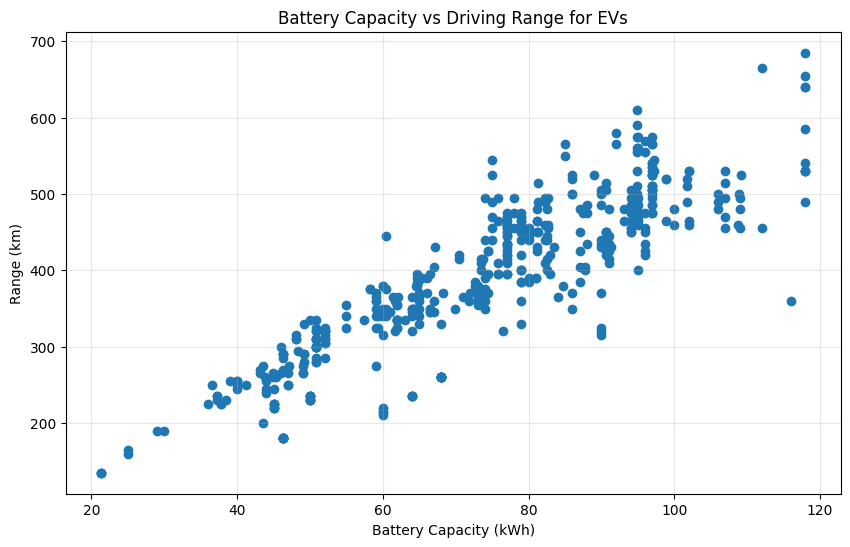

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your dataset
# Change the file name/path if needed
df = pd.read_csv("/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv")

# 2. Select and clean the relevant columns
# Make sure these column names match exactly in your CSV
battery = df["battery_capacity_kWh"]
range_km = df["range_km"]

# Drop rows with missing values in either column
mask = battery.notna() & range_km.notna()
battery_clean = battery[mask]
range_clean = range_km[mask]

print(f"Number of valid rows: {len(battery_clean)}")

# 3. Scatter plot: Battery capacity vs Range
plt.figure(figsize=(10, 6))

plt.scatter(battery_clean, range_clean)

plt.title("Battery Capacity vs Driving Range for EVs")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")

plt.grid(alpha=0.3)

plt.show()


Number of valid rows: 478


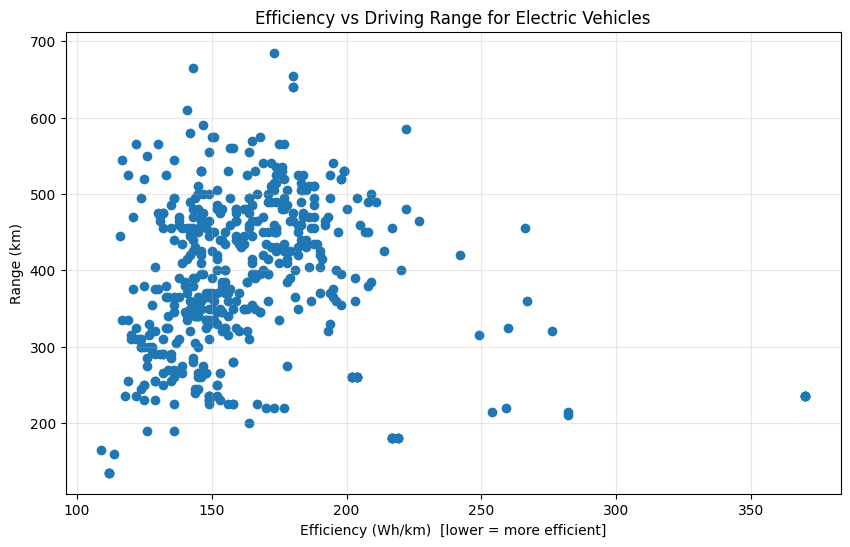

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your dataset
# Change the path/file name if needed
df = pd.read_csv("/content/drive/My Drive/d6015/electric_vehicles_spec_2025.csv")

# 2. Select and clean the relevant columns
# Make sure these column names match your CSV exactly
eff = df["efficiency_wh_per_km"]
rng = df["range_km"]

# Keep only rows where both values are present
mask = eff.notna() & rng.notna()
eff_clean = eff[mask]
rng_clean = rng[mask]

print(f"Number of valid rows: {len(eff_clean)}")

# 3. Scatter plot: Efficiency vs Range
plt.figure(figsize=(10, 6))

plt.scatter(eff_clean, rng_clean)

plt.title("Efficiency vs Driving Range for Electric Vehicles")
plt.xlabel("Efficiency (Wh/km)  [lower = more efficient]")
plt.ylabel("Range (km)")

plt.grid(alpha=0.3)
plt.show()


The scatter plot of efficiency (Wh/km) versus range (km) shows how far different EVs can travel for a given energy consumption level. Points toward the lower-right represent vehicles that achieve long range with relatively low Wh/km (high efficiency), while points toward the upper-left indicate models that require more energy per kilometre to reach similar or shorter ranges, highlighting trade-offs between size, performance, and energy use.”